# Plotting Functions

**PyModulon** contains a suite of plotting functions for data visualization and iModulon characterization.

In [1]:
from pymodulon.plotting import *
from pymodulon.example_data import load_ecoli_data

In [2]:
ica_data = load_ecoli_data()

## Overview plots
**PyModulon** contains two plots to help gain a general overview of your IcaData object.

### Compare iModulons vs Regulons
``compare_imodulon_vs_regulon`` creates a scatter plot that compares the overlap between iModulons and their linked regulators. The dashed lines creates four quadrants:

1. Top-right: iModulons that are nearly identical to known regulons ("Well-matched")
2. Top-left: iModulons contain a subset of the total genes thought to be regulated by the linked regulator ("Subset")
3. Bottom-right: iModulons contain most of the genes thought to be regulated by the linked regulator. However, these iModulons contain a high fraction of genes that are not yet confirmed to be regulated by the regulator ("Unknown-containing").
4. Bottom-left: iModulons have a small, but statistically significant, overlap with the associated regulator ("Closest match")

Additional options include:

* ``imodulons``: List of iModulons to plot
* ``cat_column``: Column in the ``imodulon_table`` that stores the category of each iModulon
* ``size_column``: Column in the ``imodulon_table`` that stores the size of each iModulon
* ``scale``: Value used to scale the size of each point
* ``reg_only``: Only plot iModulons with an entry in the ``regulator`` column of the ``imodulon_table``
* ``xlabel``: Custom x-axis label (default: "# shared genes/Regulon size")
* ``ylabel``: Custom y-axis label (default: "# shared genes/iModulon size")
* ``vline``: Draw a dashed vertical line
* ``hline``: Draw a dashed horizontal line

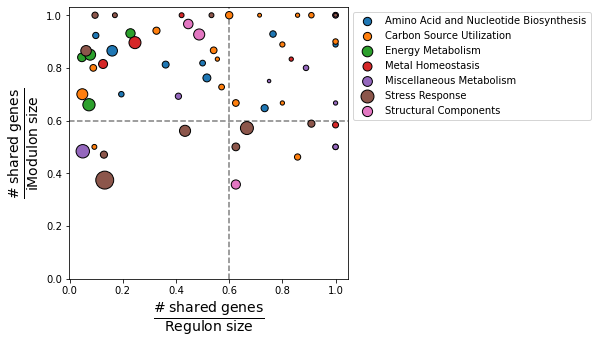

In [7]:
compare_imodulons_vs_regulons(ica_data, 
                              size_column='n_genes',
                              cat_column='Category',
                              scale=3)

### Plot explained variance

``plot_explained_variance`` gives an idea of how much of the expression variation is captured by iModulons

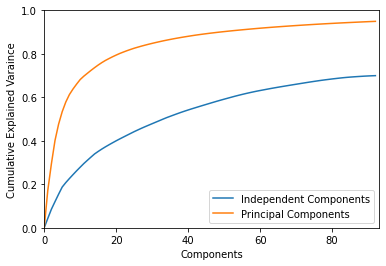

In [9]:
plot_explained_variance(ica_data)

## Bar plots
Gene expression and iModulon activities are easily viewed as bar plots. Use the ``plot_expression`` and ``plot_activities`` functions, respectively. Any numeric metadata for your experiments can be plotted using the ``plot_metadata`` function.  

Optional arguments:

* ``projects``: Only show specific project(s)
* ``highlight``: Show individiual conditions for specific project(s)
* ``ax``: Use a pre-existing [matplotlib](https://matplotlib.org/stable/index.html) axis (helpful if you want to manually determine the plot size).
* ``legend_args``: Dictionary of arguments to pass to the [matplotlib legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) (e.g. ``{'fontsize':12, 'loc':0, 'ncol':2}``)

### Plot Gene Expression

You can plot the compendium-wide expression of a gene using either the locus tag or gene name. Each bar represents an experimental condition, and points are overlaid on the bars to show the gene expression of individual replicates. The plot is subdivided into projects, as stored in the `sample_table`.

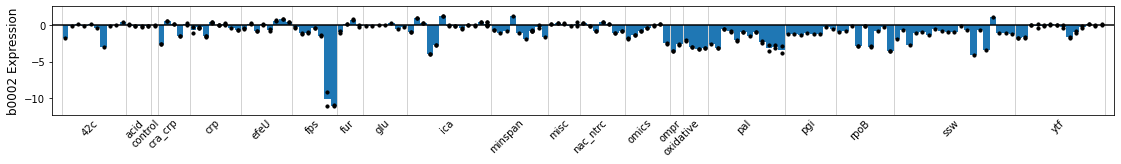

In [3]:
plot_expression(ica_data,'b0002')

The plot can be limited to specific projects using the `projects` argument. The `highlight` argument shows individual conditions in the legend.

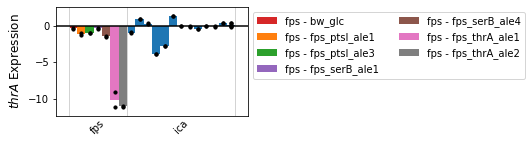

In [4]:
plot_expression(ica_data,'thrA',projects=['ica','fps'],highlight='fps')

### Plot iModulon Activities

The `plot_activities` function mirrors the `plot_expression` function, but shows iModulon activities instead of gene expression.

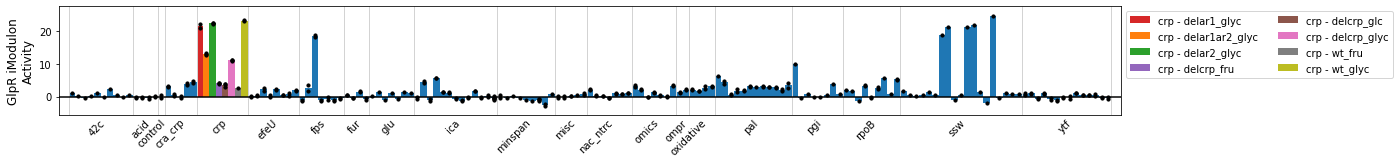

In [5]:
plot_activities(ica_data,'GlpR',highlight='crp')

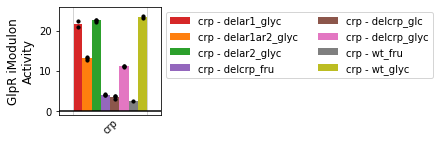

In [6]:
plot_activities(ica_data,'GlpR',projects='crp')

### Plot sample metadata

If the `sample_table` contains numerical values in a column, this column can be graphed using the `plot_metadata` function.

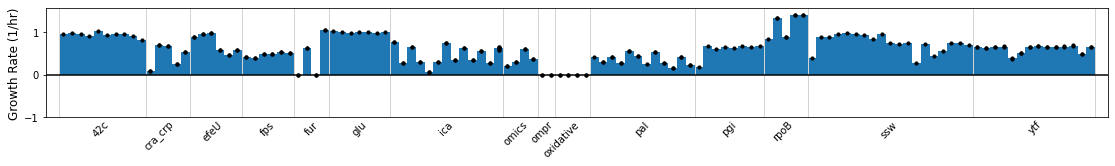

In [7]:
plot_metadata(ica_data,'Growth Rate (1/hr)')

## Scatterplots

Gene expression and iModulon activities can be compared with a scatter plot. Use the ``compare_expression`` and ``compare_activities`` functions, respectively. In addition, ``compare_values`` can be used to compare any compendium-wide value against another, including gene expression, iModulon activity, and sample metadata.

Optional arguments:

* ``groups``: Mapping of samples to specific groups
* ``colors``: Color of points, list of colors to use for different groups, or dictionary mapping groups to colors
* ``show_labels``: Show labels for points. (default: `False`)
* ``adjust_labels``: Automatically avoid label overlap
* ``fit_metric``: Correlation metric of `'pearson'`,`'spearman'`, or `'r2adj'` (default: `'pearson'`)
* ``ax``: Use a pre-existing axis (helpful if you want to manually determine the plot size)

Formatting arguments:

* `ax_font_args`: Arguments for [x-axis labels](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) and [y-axis labels](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html) (e.g. `{'fontsize':16'}`) 
* `scatter_args`: Arguments for [matplotlib scatterplot](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.scatter.html) (e.g. `{'s'=10}`)
* `label_font_args`: Arguments for [matplotlib text](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.text.html) labels (e.g. `{'fontsize':8}`)
* `legend_args`: Arguments to pass to the [matplotlib legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) (e.g. `{'fontsize':12, 'loc':0, 'ncol':2}`)

### Plot gene weights
`plot_gene_weights` will plot an iModulon's gene weights against its genomic position. If the number of genes in the iModulon is fewer than 20, it will also show the gene names (or locus tags, if gene name is unavailable). If the `gene_table` contains a `COG` column, genes will be colored by their [Cluster of Orthologous Genes](https://pubmed.ncbi.nlm.nih.gov/9381173/) category.

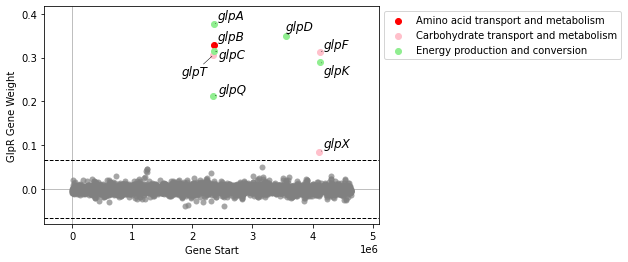

In [8]:
plot_gene_weights(ica_data,'GlpR')

If there are more than 20 genes, gene names will not be shown by default.

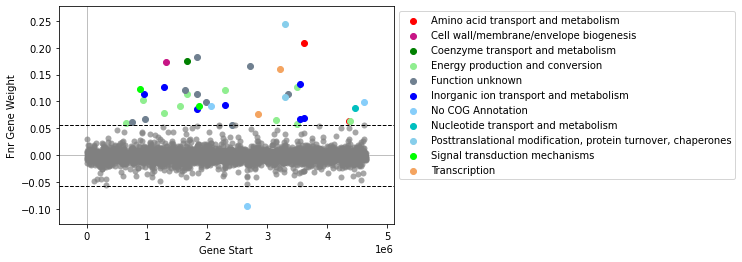

In [9]:
plot_gene_weights(ica_data,'Fnr')

Use `show_labels=True` show gene labels. It is advisable to turn of auto-adjustment of gene labels (`adjust_labels=False`), as this may take a while with many genes.

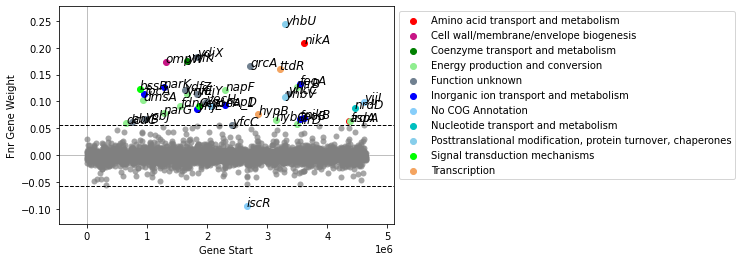

In [10]:
plot_gene_weights(ica_data,'Fnr',show_labels=True,adjust_labels=False)

### Compare two gene expression profiles

The ``compare_expression`` function plots two iModulon activities against each other. Groups of samples can be highlighted to visualize the effects of experimental conditions. 

In [11]:
groups = {'minspan__wt_glc_anaero__1':'Anaerobic',
          'minspan__wt_glc_anaero__2':'Anaerobic'}

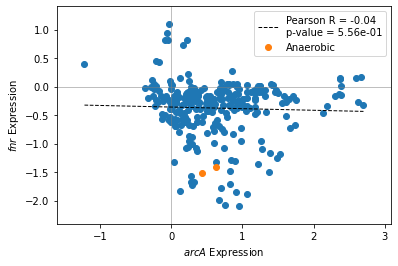

In [12]:
compare_expression(ica_data,'arcA','fnr',groups=groups)

### Compare two iModulon activities

The ``compare_activities`` function mirrors the ``compare_expression`` function.

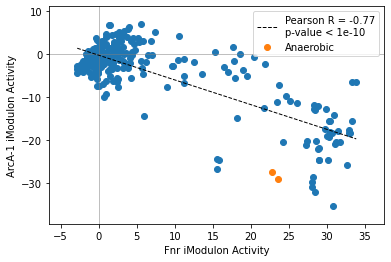

In [13]:
compare_activities(ica_data,'Fnr','ArcA-1',groups=groups)

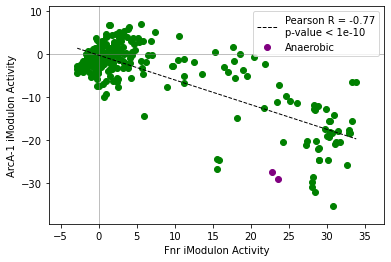

In [14]:
compare_activities(ica_data,'Fnr','ArcA-1',groups=groups,colors=['green','purple'])

### Compare iModulon gene weights

``compare_gene_weights`` plots the gene weights of two iModulons against each other. Dashed lines indicate iModulon thresholds. Genes outside both thresholds are highlighted in red and labelled.

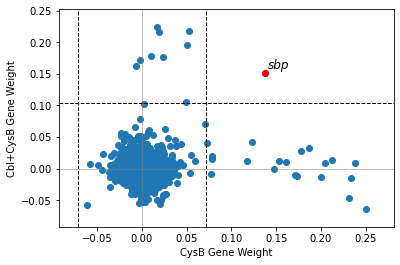

In [15]:
compare_gene_weights(ica_data,'CysB','Cbl+CysB')

### Differential iModulon activity

A **D**ifferential **iM**odulon **A**ctivity plot, or **DiMA** plot shows iModulons that have significantly different iModulon activities between two experimental conditions. The `plot_dima` function can either compare two conditions using `project:condition` keys, or using a list of sample names.

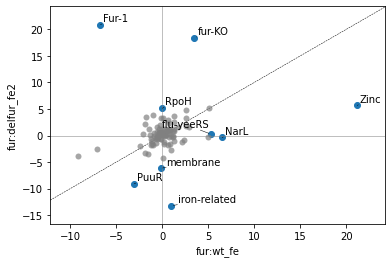

In [16]:
plot_dima(ica_data,'fur:wt_fe','fur:delfur_fe2')

To show the DiMA table, use `table=True`  
Adjusting labels can be turned off using `adjust=False`

,difference,pvalue,qvalue,0,1
Fur-1,27.598965,7.320594e-04,0.011225,-6.701019,20.897946
fur-KO,14.918007,4.338664e-08,0.000004,3.516092,18.434098
RpoH,5.145175,3.091958e-03,0.031607,0.008680,5.153855
flu-yeeRS,-5.020887,2.246638e-04,0.006612,5.299051,0.278164
membrane,-6.005727,5.390713e-05,0.002480,-0.163181,-6.168908
PuuR,-6.026142,1.397577e-03,0.017874,-3.040374,-9.066517
NarL,-6.873706,4.898118e-03,0.040966,6.520503,-0.353203
iron-related,-14.209552,2.874857e-04,0.006612,1.004311,-13.205241
Zinc,-15.497242,5.238034e-04,0.009638,21.181402,5.684160


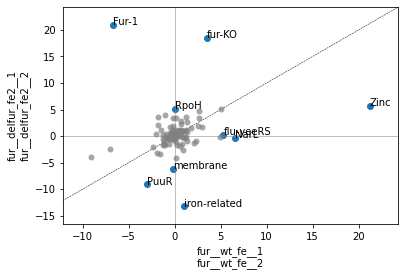

In [17]:
ax, table = plot_dima(ica_data,
          ['fur__wt_fe__1','fur__wt_fe__2'],
          ['fur__delfur_fe2__1','fur__delfur_fe2__2'],
          table=True,
          adjust=False)
table

### Compare iModulon gene weights across organisms

In order to compare gene weights across organisms, you will need the ``IcaData`` objects for both organisms, as well as a file mapping the genes between the organisms. To generate this file, see the [Comparing iModulons](./comparing_imodulons.ipynb) tutorial.

In [18]:
from pymodulon.example_data import load_staph_data, load_example_bbh
staph_data = load_staph_data()
bbh = load_example_bbh()

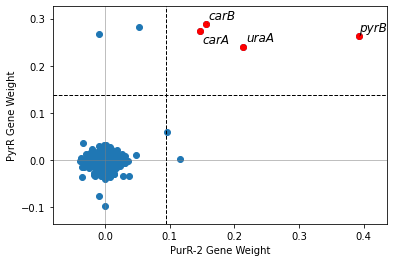

In [19]:
compare_gene_weights(ica_data,'PurR-2',
                     ica_data2 = staph_data,
                     imodulon2 = 'PyrR', 
                     ortho_file = bbh)

Use ``use_org1_names`` to switch which organism's gene names are shown.

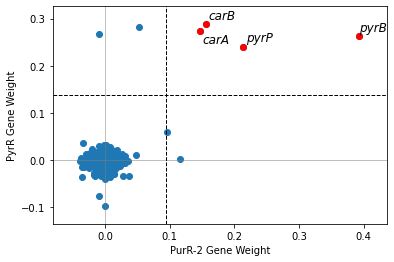

In [20]:
compare_gene_weights(ica_data,'PurR-2',
                     ica_data2 = staph_data,
                     imodulon2 = 'PyrR', 
                     ortho_file = bbh,
                     use_org1_names = False)

## Automated metadata classification
The function ``metadata_boxplot`` automatically classify iModulon activities given metadata information. Optional arguments include:

* ``show_points``: Overlay individual points on top of the boxplot. By default, this is True, and uses a [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html).
  * ``show_points='swarm'`` will use a [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot).
* ``n_boxes``: Number of boxes to create
* ``sample``: Subset of samples to analyze
* ``strip_conc``: Remove concentrations from metadata (e.g. "glucose(2g/L)" would be interpreted as just "glucose"). Default is ``True``.
* ``ignore_cols``: List of columns to ignore. If empty, only ``project`` and ``condition`` are ignored.
* ``use_cols``: List of columns to use. This supercedes ``ignore_cols``.
* ``return_results``: Return a DataFrame describing the classifications.

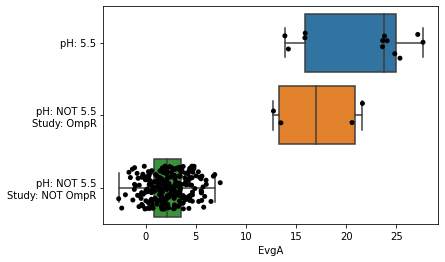

In [25]:
metadata_boxplot(ica_data,"EvgA",ignore_cols=['GEO','study','project','DOI'])

The `use_cols` argument selects which columns to use from the `sample_table`.

To turn off individual points, set `show_points=False`. Alternatively, `show_points='swarm'` will use a [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot).

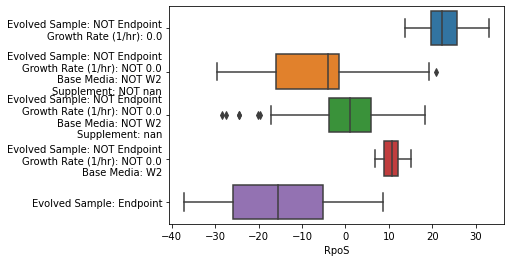

In [26]:
metadata_boxplot(ica_data,"RpoS",n_boxes=5,use_cols=['Base Media','Carbon Source (g/L)', 'Nitrogen Source (g/L)','Supplement','Evolved Sample','pH','Growth Rate (1/hr)'],
                 show_points=False)

The `samples` argument selects specific samples to plot

The `strip_kwargs` argument can be used to customize the [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

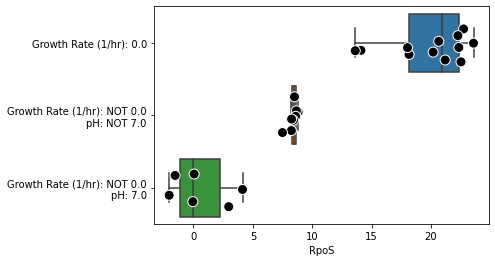

In [40]:
metadata_boxplot(ica_data,"RpoS", 
                 n_boxes=3, 
                 samples=ica_data.sample_names[:26], 
                 ignore_cols = ['DOI','GEO'],
                 strip_kwargs={'size':10, 'edgecolor':'white', 'linewidth':1})

## iModulon histograms
iModulon gene weights can be visualized in a histogram. If you wish to highlight genes in a regulon, it can be visualized either as overlapping bars, or side-by-side bars.

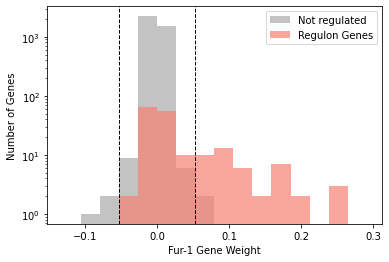

In [23]:
plot_regulon_histogram(ica_data,'Fur-1','fur')

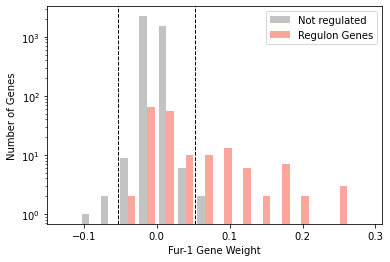

In [24]:
plot_regulon_histogram(ica_data,'Fur-1','fur',kind='side')

## Activity Clustering

The iModulon activites in the ``A`` matrix can be clustered based on correlation between their activities across conditions in the compendium.

Use the ``cluster_activities`` function to prepare a [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html); the minimal input is simply your ``IcaData`` object.

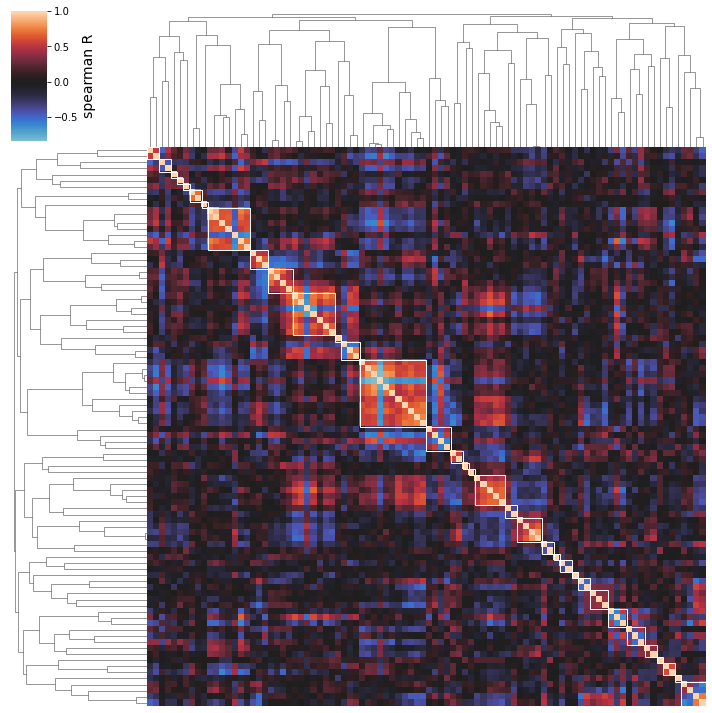

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

In [25]:
cluster_activities(ica_data)

### Using different correlation metrics
You can use multiple correlation metrics, including `"pearson"`,`"spearman"`, and `"mutual_info"`. Mutual information is most likely to identify biologically similar iModulons, but can be more difficult to interpret as it finds both linear and non-linear correlations.

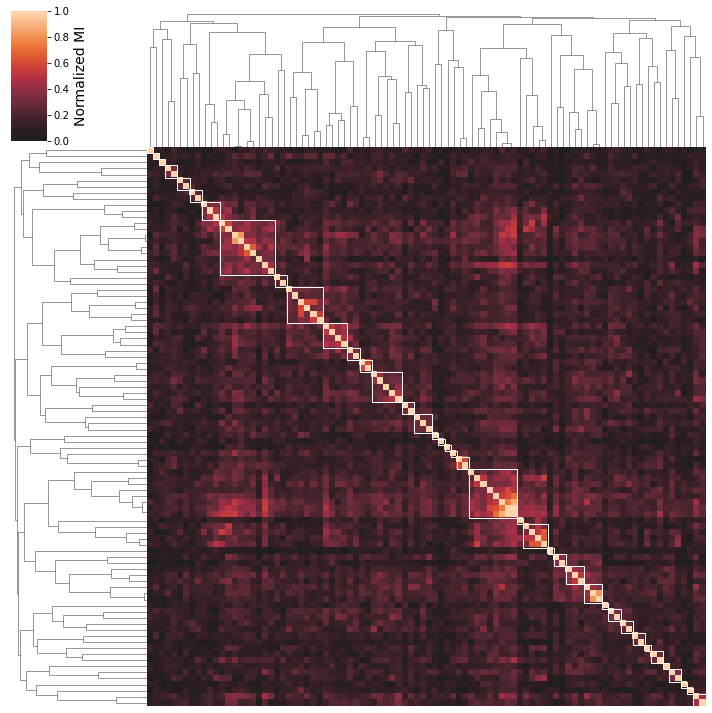

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.9500000000000001,
                         linkage='complete', n_clusters=None)]

In [26]:
cluster_activities(ica_data,correlation_method='mutual_info')

### Automatic Distance Thresholding

[Agglomerative (hierarchical) clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) is used under the hood. Thus, a distance threshold for defining "flat" clusters from the hierarchical structure must be determined. By default, this distance threshold is automagically calculated using a sensitivity analysis. 

Different distance thresholds (this value is between 0 and 1) are tried, and the resulting clustering is assessed using a [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) (a measure of how separate the clusters are). The distance threshold yielding the maximum silhouette score is automatically chosen.

To see the result of this sensitivity analysis, use the ``show_thresholding`` option.

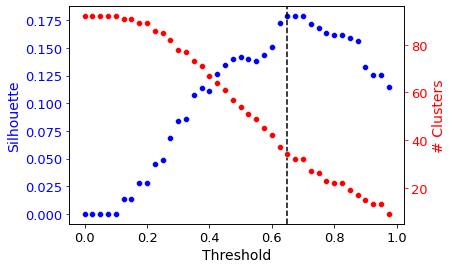

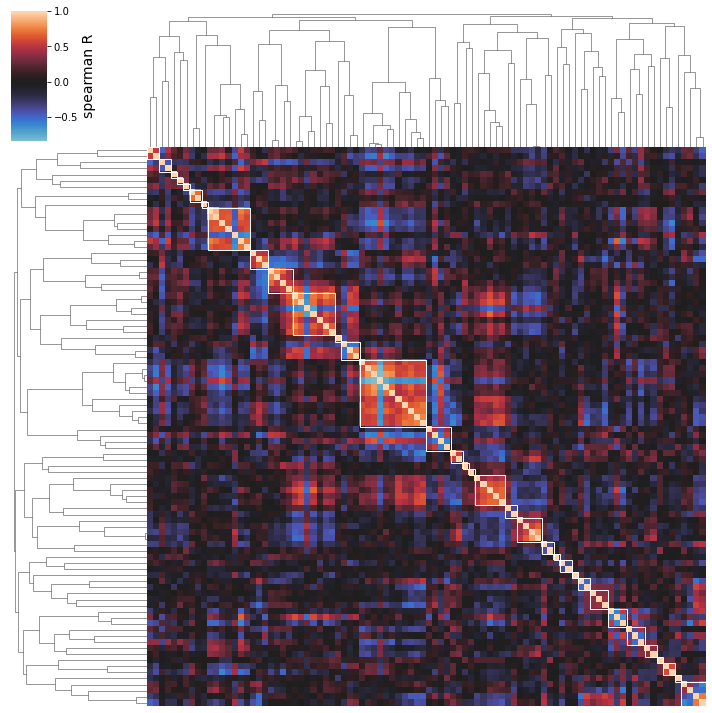

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

In [27]:
cluster_activities(ica_data, show_thresholding=True)

### Manual Distance Threshold

You may also determine that you're interested in manually varying the distance threshold to see what happens to the iModulon clusters. Setting this threshold manually (with the ``distance_threshold`` option) will override the automatic thresholding shown above. 

Note: ``distance_threshold`` must be set to a value between 0 and 1; larger values will generally yield smaller numbers of larger clusters, as shown in the thresholding plot above.

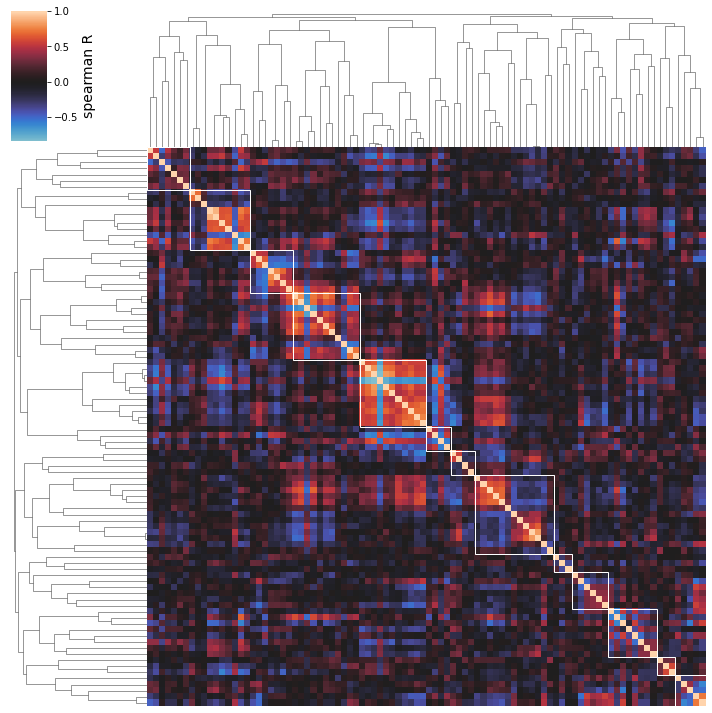

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.95, linkage='complete',
                         n_clusters=None)]

In [28]:
cluster_activities(ica_data, distance_threshold=0.95)

### Displaying Best Clusters

The above clustermaps do not allow you to see which iModulons are actually being clustered together; use the ``show_best_clusters`` option to call out an additional plot that shows such clusters. 

By default, the clusters whose individual silhouette scores are greater than the mean silhouette score (indicating their separation from the other clusters is above-average) will be shown.

The cluster numbers come from the scikit-learn ``AgglomerativeClustering`` estimator that actually performs the clustering; these labels don't have any special significance and are just unique identifiers for each cluster. You can also access an iModulon-index-matched list of these labels by accessing the ``labels_`` attribute of the ``AgglomerativeClustering`` object (which is returned by ``cluster_activities``).

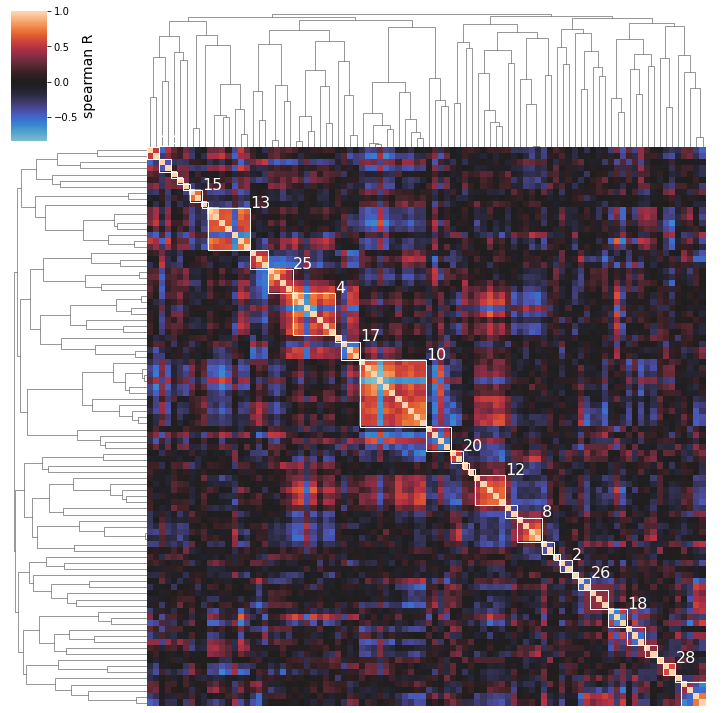

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

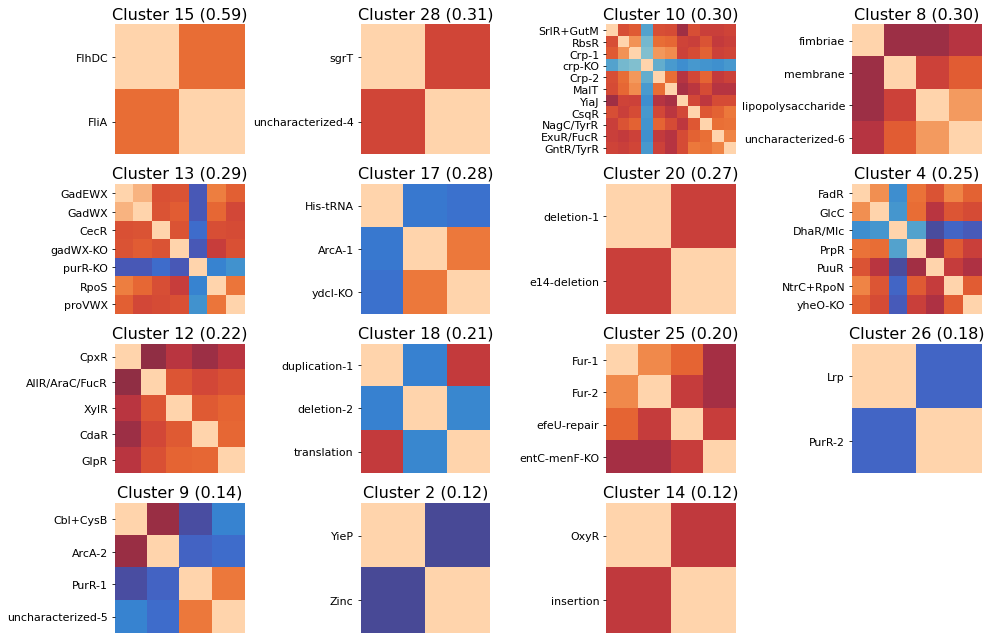

In [29]:
cluster_activities(ica_data, show_best_clusters=True)

So we can see here that the clustering method does seem to capture some biologically-relevant groups of iModulons: Cluster 15 contains 2 flagella regulators, Cluster 8 is membrane-related, Cluster 13 is stress-related, Cluster 25 is iron-related, Cluster 12 is carbon metabolism related, etc.

NOTE: the parenthesized numbers next to the cluster names are the clusters' silhouette scores (a 0 to 1 measure of a cluster's separation from the pack).

Perhaps you're only interested in seeing a specific number of the top clusters; use the ``n_best_clusters`` argument to specify this preference:

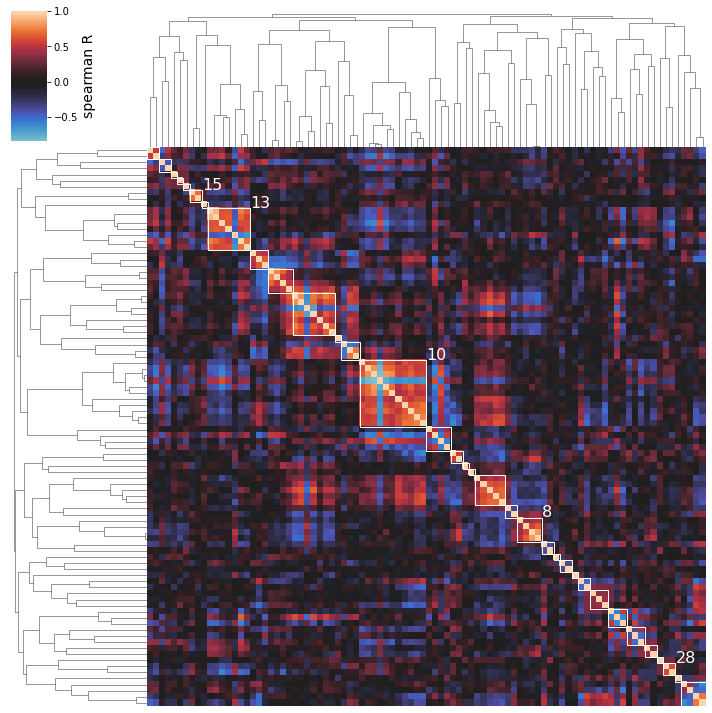

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

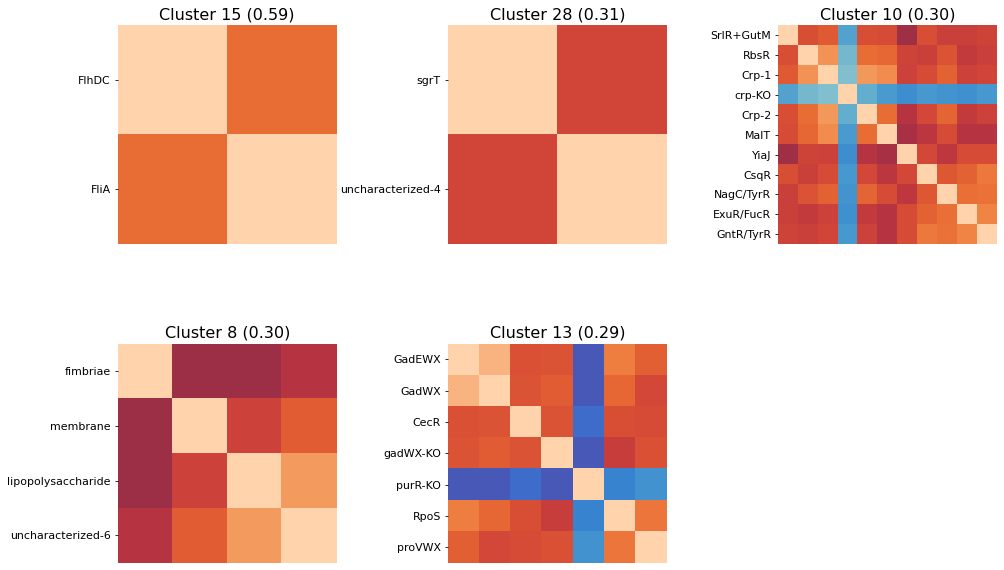

In [30]:
cluster_activities(ica_data, show_best_clusters=True, n_best_clusters=5)

### Naming Clusters

After performing an initial clustering and manually mapping knowledge onto your best clusters, you may decide on a new, more descriptive name for some of your clusters. To generate pretty figures that use these names instead of the soulless integer IDs, use the ``cluster_names`` option to map the integer IDs to names. You don't have to rename all clusters. 

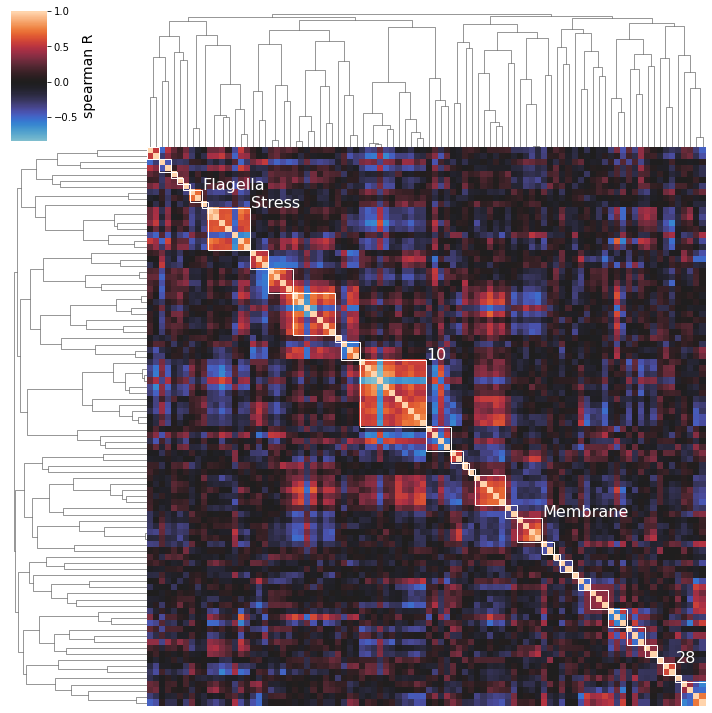

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None)]

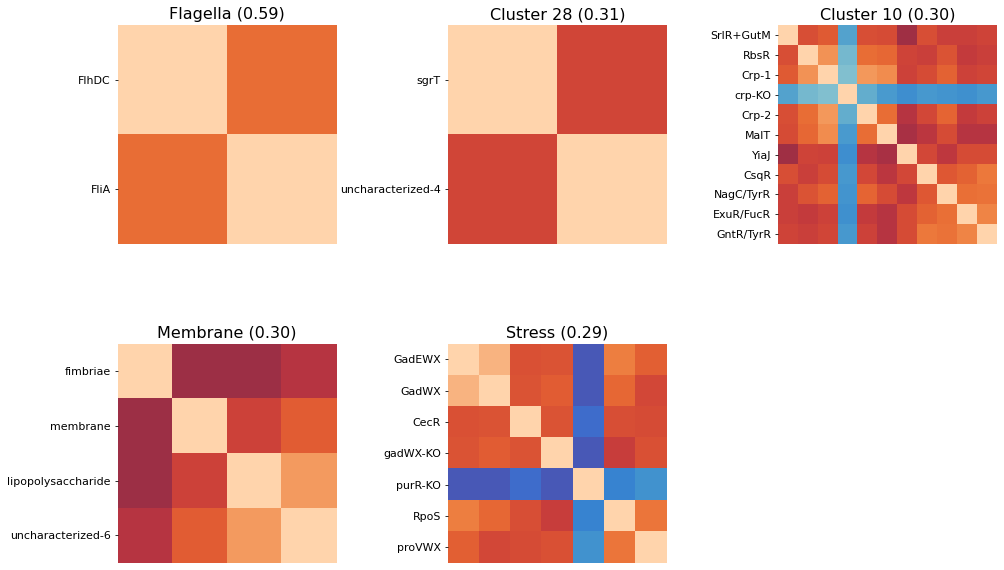

In [31]:
cluster_activities(
    ica_data, show_best_clusters=True, n_best_clusters=5,
    cluster_names={15: 'Flagella', 8: 'Membrane', 13: 'Stress'}
)

### DIMCA

Differential iModulon Cluster Activity (**DIMCA**) analysis, a sister method to the differential iModulon activity (**DIMA**) analysis, allows you to compare all iModulon activities between 2 or more conditions. 

``cluster_activities`` itself has the capability to perform **DIMCA** analyses, exposing a series of `dimca_`-prefixed arguments that correspond with the arguments to ``plot_dima`` (which is in fact used under the hood). 

For **DIMCA**, a "cluster activity" will be calculated for each of your best clusters (however many you ask for) and then plotted between your 2 conditions, instead of that cluster's constituent iModulons. In this way, a **DIMA** plot can be rendered even simpler.

Cluster activities are simply the averages of the activities of the constituent iModulons, **EXCEPT** that for iModulons that are generally anti-correlated with the others in a cluster (see purR-KO from the above plot, for example), the sign of the activities is first switched.

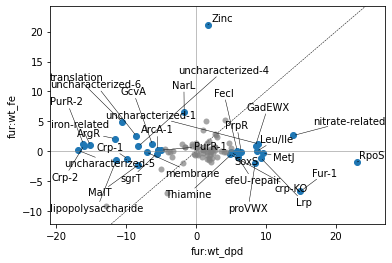

In [32]:
plot_dima(ica_data, 'fur:wt_dpd', 'fur:wt_fe')

This DIMA plot is fairly busy; we can use DIMCA to reduce the number of points even further:

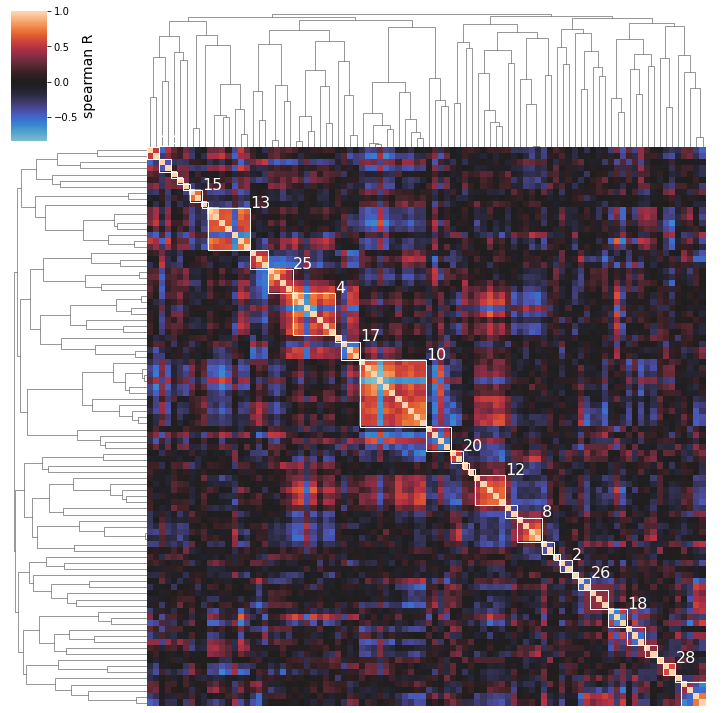

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None),

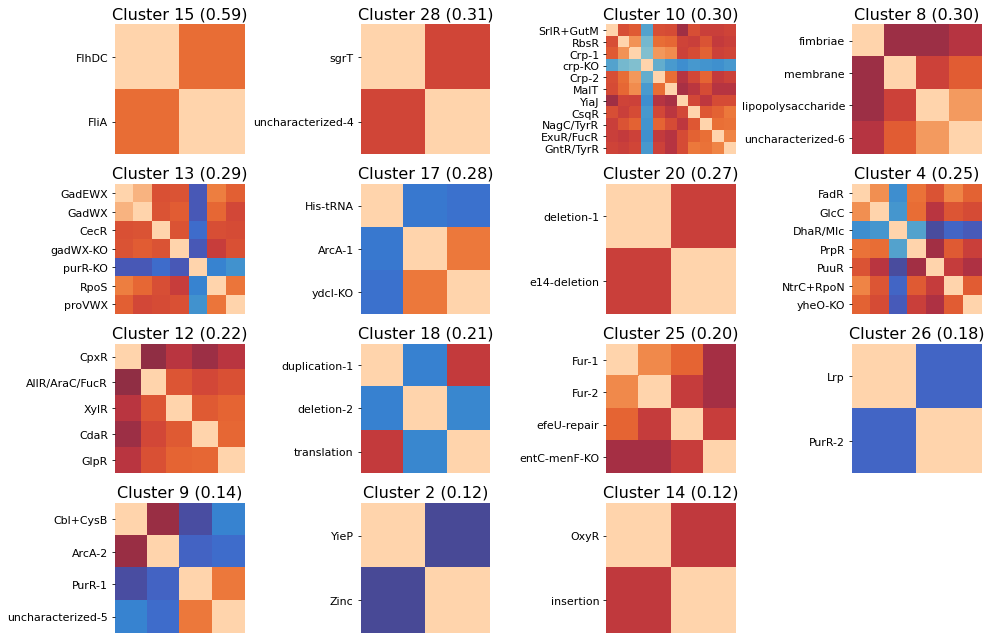

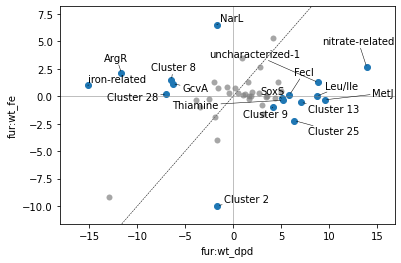

In [33]:
cluster_activities(ica_data, show_best_clusters=True, dimca_sample1='fur:wt_dpd', dimca_sample2='fur:wt_fe')

Thus, we have a somewhat simpler picture of this comparison. We can increase the number of best clusters we ask for to yield only cluster points; be careful with this though, as some of the worse-scoring clusters are actually "singleton" clusters with just a single iModulon in them (for these iModulons' activities are generally uncorrelated with the other iModulons in the dataset).

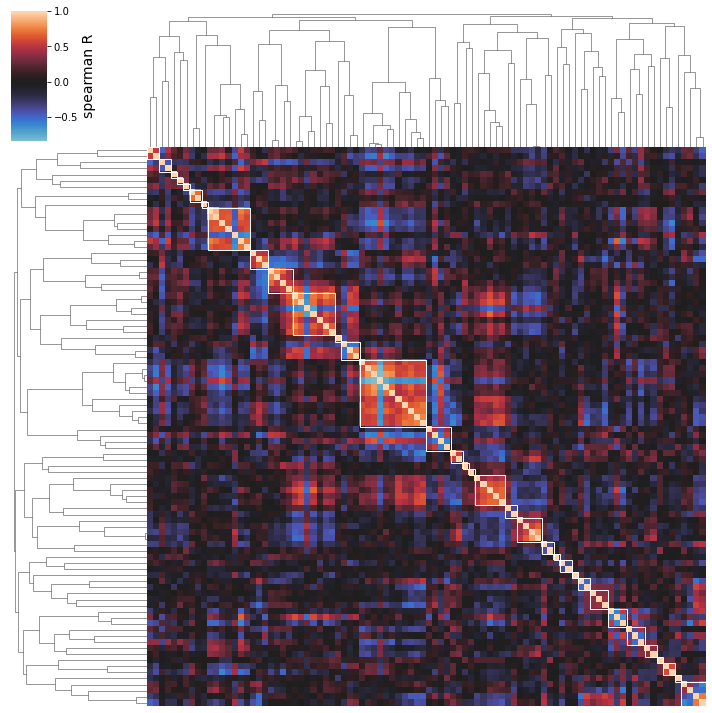

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.65, linkage='complete',
                         n_clusters=None),

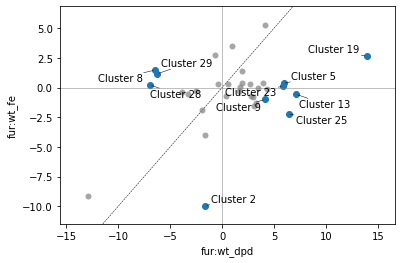

In [34]:
cluster_activities(ica_data, n_best_clusters=50, dimca_sample1='fur:wt_dpd', dimca_sample2='fur:wt_fe')

And as before, if we name clusters, those names will propagate to the **DIMCA** plot (and **DIMCA** table if requested):

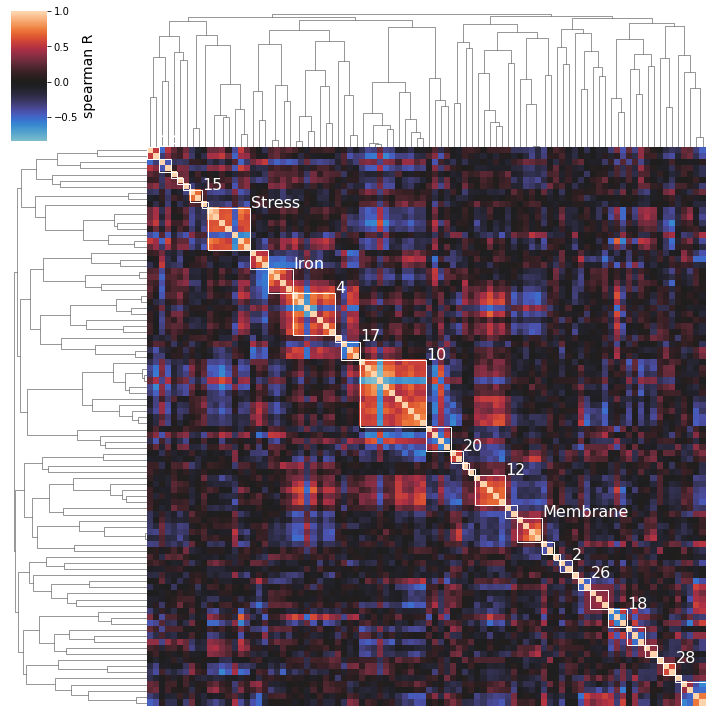

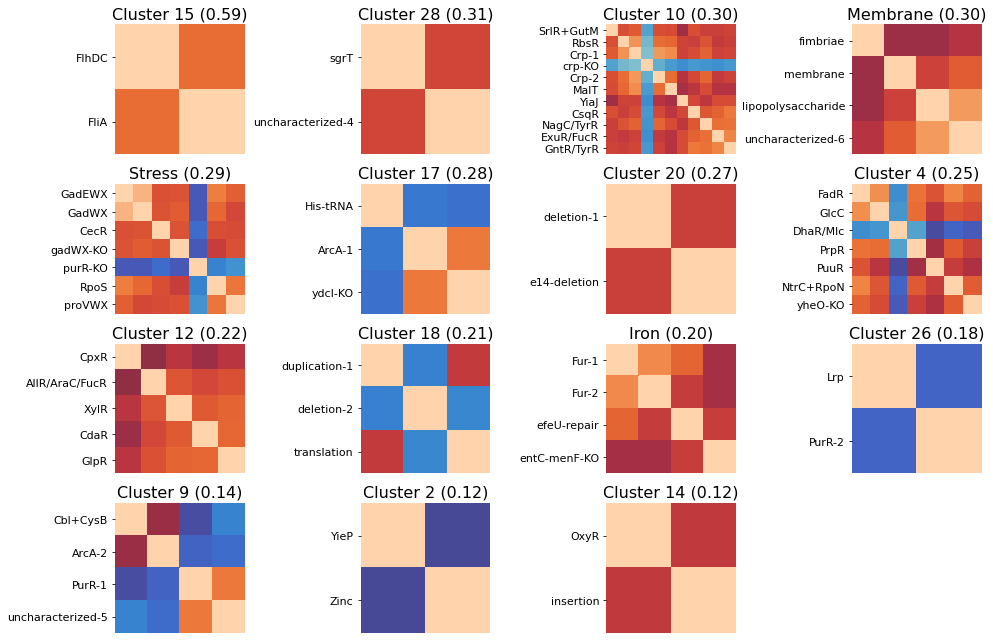

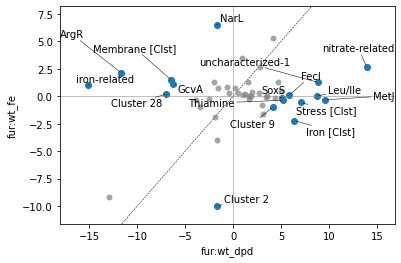

In [35]:
cluster_obj, dimca_ax, table = cluster_activities(
    ica_data, show_best_clusters=True,
    cluster_names={25: 'Iron', 13: 'Stress', 8: 'Membrane'},
    dimca_sample1='fur:wt_dpd', dimca_sample2='fur:wt_fe', dimca_table=True
)

In [36]:
table

,difference,pvalue,qvalue,0,1
iron-related,16.153595,0.000168,0.001971,-15.149284,1.004311
ArgR,13.753341,0.002044,0.005877,-11.636817,2.116524
NarL,8.227232,0.002884,0.007045,-1.706729,6.520503
Membrane [Clst],7.906679,0.001441,0.004514,-6.433855,1.472824
GcvA,7.412801,0.000035,0.000823,-6.265427,1.147374
Cluster 28,7.156066,0.000250,0.002347,-6.943347,0.212719
Cluster 9,-5.126362,0.000456,0.002925,4.132141,-0.994221
SoxS,-5.226992,0.000665,0.003127,5.043639,-0.183353
Thiamine,-5.558917,0.003923,0.007682,5.193298,-0.365619
FecI,-5.760403,0.001402,0.004514,5.871660,0.111257


Note that ``[Clst]`` is added to cluster names in the **DIMCA** plot to avoid confusion with unclustered iModulons.